 Assignment to execute Exploratory Data Analysis (EDA), Data Preparation, and, finally, apply the Principal Component Analysis (PCA) in order to reduce the dimension of the dataset while maintaining 98% of its variance and then applying the Logistic Regression Model.


# Importing libraries and dataset

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
from numpy import count_nonzero
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy import sparse

In [2]:
# Reading the dataset

missing_value_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
df = pd.read_csv(r"C:\Users\hp\Documents\GitHub\RT-Sem-2\ama\aps_failure_set.csv", na_values = missing_value_formats)
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


# Becoming acquainted with the dataset

In [3]:
# Discovering the shape of the dataset

df.shape

(60000, 171)

In [4]:
# Obtaining basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [5]:
# Obtaining basic information about the dataset with columns details

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #   Column  Dtype  
---  ------  -----  
 0   class   object 
 1   aa_000  int64  
 2   ab_000  float64
 3   ac_000  float64
 4   ad_000  float64
 5   ae_000  float64
 6   af_000  float64
 7   ag_000  float64
 8   ag_001  float64
 9   ag_002  float64
 10  ag_003  float64
 11  ag_004  float64
 12  ag_005  float64
 13  ag_006  float64
 14  ag_007  float64
 15  ag_008  float64
 16  ag_009  float64
 17  ah_000  float64
 18  ai_000  float64
 19  aj_000  float64
 20  ak_000  float64
 21  al_000  float64
 22  am_0    float64
 23  an_000  float64
 24  ao_000  float64
 25  ap_000  float64
 26  aq_000  float64
 27  ar_000  float64
 28  as_000  float64
 29  at_000  float64
 30  au_000  float64
 31  av_000  float64
 32  ax_000  float64
 33  ay_000  float64
 34  ay_001  float64
 35  ay_002  float64
 36  ay_003  float64
 37  ay_004  float64
 38  ay_005  float64
 39  ay_006  float64
 40  ay_

In [6]:
# Observing a sample of the dataframe

df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [7]:
# Obtaining a summary of the dataset basic statistics

df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


Finally, the dependent variable "class" will be explored to see the proportions of the entries "pos" and "neg". First, the function "value_counts" shows the count of each entry.

In [8]:
# Counting the values in the feature "class"

df["class"].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

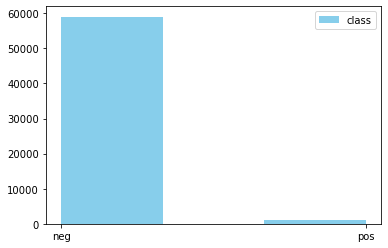

In [9]:
# Plotting a histogram of the feature "class"

df["class"].hist(grid = False, xlabelsize = 10, ylabelsize = 10, legend = "class", color="skyblue", bins = 3);

Approximately 84% of the values in "class" are negative and only 16% of them show a positive relationship between the failures and components of the APS.

# Checking for duplicates

In [10]:
# Ckecking for duplicates

print("There are a total of " + (str(df.duplicated().sum()) + " duplicates in the dataset."))

There are a total of 0 duplicates in the dataset.


# Checking for missing values

In [11]:
# Checking if there are any missing values

df.isna().values.any()

True

In [12]:
# Checking the total of missing values

df.isna().sum().sum()

850015

In [13]:
# Checking if there are any missing values in the column "class"

df["class"].isna().sum().sum()

0

It is possible to observe that while there is no missing value in the column "class", there is a fraction over 8% of missing values in the remaining 170 columns of the dataset.

To start handling the missing values, it is important to mention that there is no specific limit of missing values from which it is determined that an entire column should be dropped from the dataset, and opinions from experts may differ. 


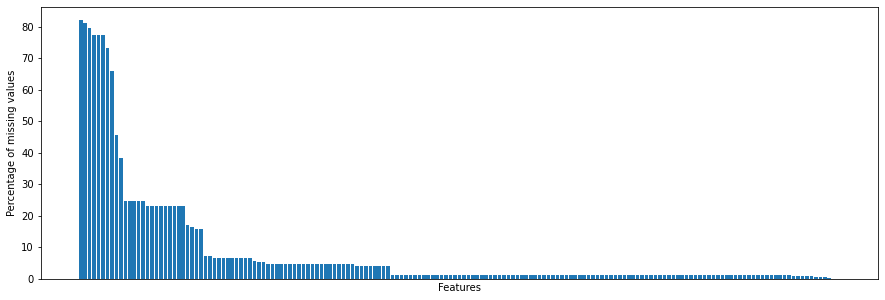

In [15]:
# calculating the percentage of missing values for each feature

df_na = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by = 0, ascending = False)

fig, ax = plt.subplots(figsize = (15, 5))
ax.bar(df_na.index, df_na.values.T[0])
plt.xticks([])
plt.xlabel("Features")
plt.ylabel("Percentage of missing values");

In [16]:
# Checking how many columns have more than 60% missing values

cols_na = df_na[df_na[0] > 60]
print("There are " + str(len(cols_na)) + " columns with NaNs above 60%.")

There are 8 columns with NaNs above 60%.


In [19]:
#30 features with highest null values
null_30 = df.isnull().sum().sort_values(ascending=False).head(30)
null_30

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
cr_000    46329
ab_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
cf_000    14861
co_000    14861
cg_000    14861
ch_000    14861
ad_000    14861
cx_000    13808
ct_000    13808
cv_000    13808
cu_000    13808
cy_000    13808
cz_000    13808
da_000    13808
db_000    13808
dc_000    13808
ec_00     10239
cm_000     9877
cl_000     9553
ed_000     9553
ak_000     4400
ca_000     4356
dtype: int64

While it is important to consider the variables themselves in the decisions, this analysis is being done in a dataset with a level of veiled information, which makes this impossible to be considered. That said, the 8 columns with more than 60% of missing values will be dropped.

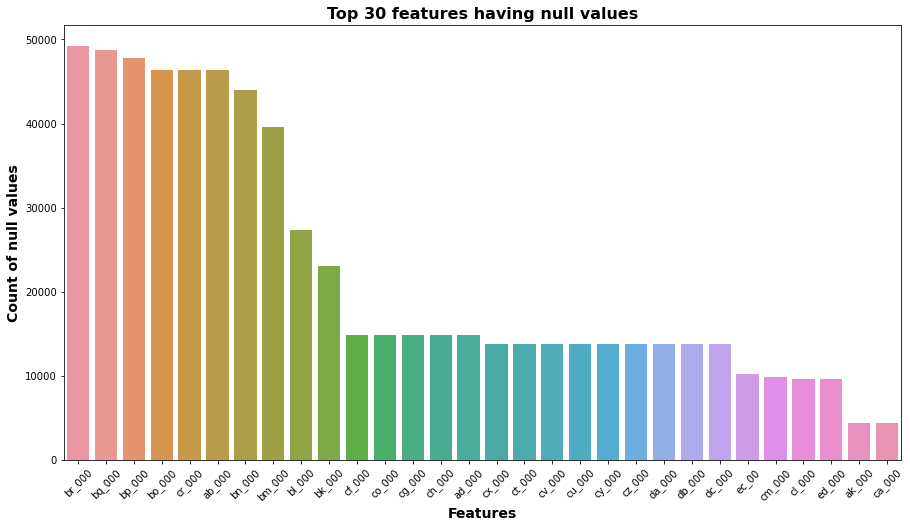

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(15,8))

# Assuming 'null_30' is a pandas Series containing the count of null values for the top 30 features
# Plot a bar plot with the count of null values on the y-axis and feature names on the x-axis
sns.barplot(y=null_30, x=null_30.index)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels for the axes
plt.ylabel("Count of null values", fontsize=14, fontweight="bold")
plt.xlabel("Features", fontsize=14, fontweight="bold")

# Set the title of the plot
plt.title("Top 30 features having null values", fontsize=16, fontweight='bold', y=1)

# Display the plot
plt.show()


In [21]:
# Obtaining a list of the columns with more than 60% missing values

cols_to_drop = list(cols_na.index)
cols_to_drop

['br_000',
 'bq_000',
 'bp_000',
 'bo_000',
 'ab_000',
 'cr_000',
 'bn_000',
 'bm_000']

In [22]:
# Dropping the columns with more than 60% missing values

df = df.drop(columns = ["br_000", "bq_000", "bp_000", "bo_000", "ab_000", "cr_000", "bn_000", "bm_000"])
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [23]:
# Checking if there are any missing values in the dataset after dropping the columns with more than 60% missing values

df.isna().values.any()

True

In [24]:
# Checking the total of missing values in the dataset after dropping the columns with more than 60% missing values

df.isna().sum().sum()

481740

The actual count of missing values in the whole dataset is 481740 entries, around 5% of the actual dataset.

# Calculating the sparsity of the dataset

After continuing with the treatment of the missing value, the sparsity of the dataset might be analysed in order to define the next steps.

Though there is not a clear definition of what is the threshold from which a dataset or matrix is considered sparse, some say that roughly half of the observations or more than half of them should be zero for the dataset or matrix to be considered sparse.


In [25]:
# Calculating the sparsity of the data

sparsity = 1 - count_nonzero(df) / df.size
print("Sparsity of the dataframe is: " + str(round(sparsity, 2)) + ".")

Sparsity of the dataframe is: 0.33.


Even though 33% is quite a high percentage, it is still fairly far from 50%. The Scipy "issparse" function will be applied next to confirm if the dataset is not considered sparse.

In [26]:
# Confirming if data is sparse

sparse.issparse(df)

False

In [27]:
df

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


# Scaling the data

In [30]:
# Assigning the independet variables to a new variable X

X = df.drop("class", axis = 1)

# Assigning the dependent variable to a new variable y

y = df["class"]

In [31]:
# Scaling the independent variables

scaler = preproc.MinMaxScaler()
X = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X)
df_scaled.values

array([[2.79250729e-02, 9.99999832e-01, 3.26176944e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00,            nan, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 1.16491766e-08, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 2.09685178e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 5.75469322e-08, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 7.31568288e-08, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

# Checking for outliers

In [32]:
# Calculating the lower limit

lower_limit = df_scaled.mean() - 1.5 * df_scaled.std()
lower_limit

0     -0.057821
1     -0.392498
2     -0.007038
3     -0.011187
4     -0.015131
         ...   
157   -0.018781
158   -0.027795
159   -0.016487
160   -0.013408
161   -0.011373
Length: 162, dtype: float64

In [33]:
# Calculating the upper limit

upper_limit = df_scaled.mean() + 1.5 * df_scaled.std()
upper_limit

0      0.101029
1      0.726673
2      0.007082
3      0.011835
4      0.016228
         ...   
157    0.024572
158    0.042195
159    0.020891
160    0.013784
161    0.011744
Length: 162, dtype: float64

After calculating the limits, the dataset can be displayed showing only the outliers while the non-outliers are viewed, temporarily, as NaN.

In [34]:
# Displaying the outliers

display(df_scaled[~((df_scaled < upper_limit) & (df_scaled > lower_limit))])

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027923
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046641,NaN,NaN,NaN
59996,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101946,NaN,NaN


In [35]:
numeric_features = df.columns[1:]

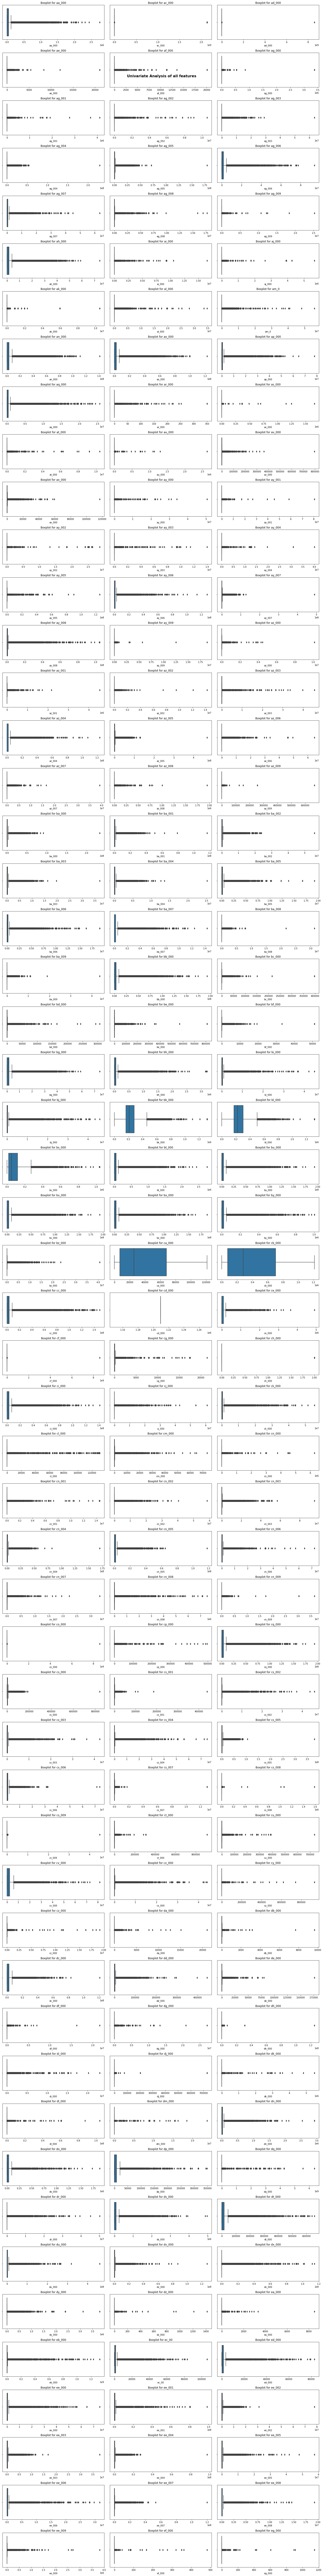

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and numeric_features is a list of numeric column names

plt.figure(figsize=(20, 250))
plt.suptitle("Univariate Analysis of all features", fontsize=16, fontweight='bold')

for i, feature in enumerate(numeric_features):
    plt.subplot(85, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.tight_layout()

plt.show()



The outliers will, then, be selected and replaced with NaN, using the Numpy function "np.nan". And the sum of all NaN values is checked once more.

In [36]:
# Replacing the outliers with NaNs

df_scaled[df_scaled < lower_limit] = np.nan
df_scaled[df_scaled > upper_limit] = np.nan

In [37]:
# Checking the amount of null values in the dataset after removing outliers and leaving the observations null

df_scaled.isna().sum().sum()

692782

At this point, the total of missing values is increased to 692782, which represents, now, approximately 7% of the dataset.

# Filling all missing values

The next step is to fill in the missing values with the most appropriate method. In this case, they will be replaced with the median, to avoid any interference in the shape of the distribution.

While the mean is sensitive to every value, the median is not drastically affected by a few extreme values and, because of that, it is known as a resistant measure of centre. 

In [38]:
# Replacing the NaNs with median values

column_medians = df_scaled.median()
df_scaled = df_scaled.fillna(column_medians)
display(df_scaled)

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,0.027925,3.473026e-08,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.627842e-04,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.0
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.977081e-05,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.0
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.201835e-06,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.0
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,9.666541e-06,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.0
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.911982e-04,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.055707,3.116337e-07,2.166747e-08,0.0,0.000000,0.0,0.0,0.0,0.000040,2.582697e-04,...,0.012812,0.015013,1.328221e-02,2.121074e-02,3.226316e-02,0.006002,0.000137,0.007503,0.000000,0.0
59996,0.000832,3.473026e-08,2.609416e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,4.544847e-07,...,0.000136,0.000179,2.174522e-04,1.191324e-03,4.302733e-06,0.000000,0.000000,0.000000,0.000000,0.0
59997,0.000041,3.473026e-08,2.096852e-09,0.0,0.000000,0.0,0.0,0.0,0.000000,1.223613e-07,...,0.000010,0.000010,4.652485e-06,2.507172e-06,4.619111e-06,0.000022,0.000000,0.000000,0.000000,0.0
59998,0.029234,3.473026e-08,5.754693e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.442115e-06,...,0.008974,0.005897,3.575600e-03,3.930061e-03,6.151643e-03,0.001380,0.041639,0.000000,0.000000,0.0


In [39]:
# Confirming that there is no null values in the dataset after replacing them with medians

df_scaled.isna().sum().sum()

0

In [40]:
df_scaled['class']=df['class']

In [41]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,class
0,0.027925,3.473026e-08,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.627842e-04,...,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.0,neg
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.977081e-05,...,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.0,neg
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.201835e-06,...,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.0,neg
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,9.666541e-06,...,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.0,neg
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.911982e-04,...,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.055707,3.116337e-07,2.166747e-08,0.0,0.000000,0.0,0.0,0.0,0.000040,2.582697e-04,...,0.015013,1.328221e-02,2.121074e-02,3.226316e-02,0.006002,0.000137,0.007503,0.000000,0.0,neg
59996,0.000832,3.473026e-08,2.609416e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,4.544847e-07,...,0.000179,2.174522e-04,1.191324e-03,4.302733e-06,0.000000,0.000000,0.000000,0.000000,0.0,neg
59997,0.000041,3.473026e-08,2.096852e-09,0.0,0.000000,0.0,0.0,0.0,0.000000,1.223613e-07,...,0.000010,4.652485e-06,2.507172e-06,4.619111e-06,0.000022,0.000000,0.000000,0.000000,0.0,neg
59998,0.029234,3.473026e-08,5.754693e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.442115e-06,...,0.005897,3.575600e-03,3.930061e-03,6.151643e-03,0.001380,0.041639,0.000000,0.000000,0.0,neg


# Label Encoding

In [42]:
#encode labels to 0 and 1
le = LabelEncoder()
df_scaled['class'] = le.fit_transform(df_scaled['class'])
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,class
0,0.027925,3.473026e-08,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.627842e-04,...,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.0,0
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.977081e-05,...,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.0,0
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,7.201835e-06,...,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.0,0
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,9.666541e-06,...,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.0,0
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.911982e-04,...,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.055707,3.116337e-07,2.166747e-08,0.0,0.000000,0.0,0.0,0.0,0.000040,2.582697e-04,...,0.015013,1.328221e-02,2.121074e-02,3.226316e-02,0.006002,0.000137,0.007503,0.000000,0.0,0
59996,0.000832,3.473026e-08,2.609416e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,4.544847e-07,...,0.000179,2.174522e-04,1.191324e-03,4.302733e-06,0.000000,0.000000,0.000000,0.000000,0.0,0
59997,0.000041,3.473026e-08,2.096852e-09,0.0,0.000000,0.0,0.0,0.0,0.000000,1.223613e-07,...,0.000010,4.652485e-06,2.507172e-06,4.619111e-06,0.000022,0.000000,0.000000,0.000000,0.0,0
59998,0.029234,3.473026e-08,5.754693e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,1.442115e-06,...,0.005897,3.575600e-03,3.930061e-03,6.151643e-03,0.001380,0.041639,0.000000,0.000000,0.0,0


In [43]:
X=df_scaled.drop("class",axis=1)
y=df_scaled['class']

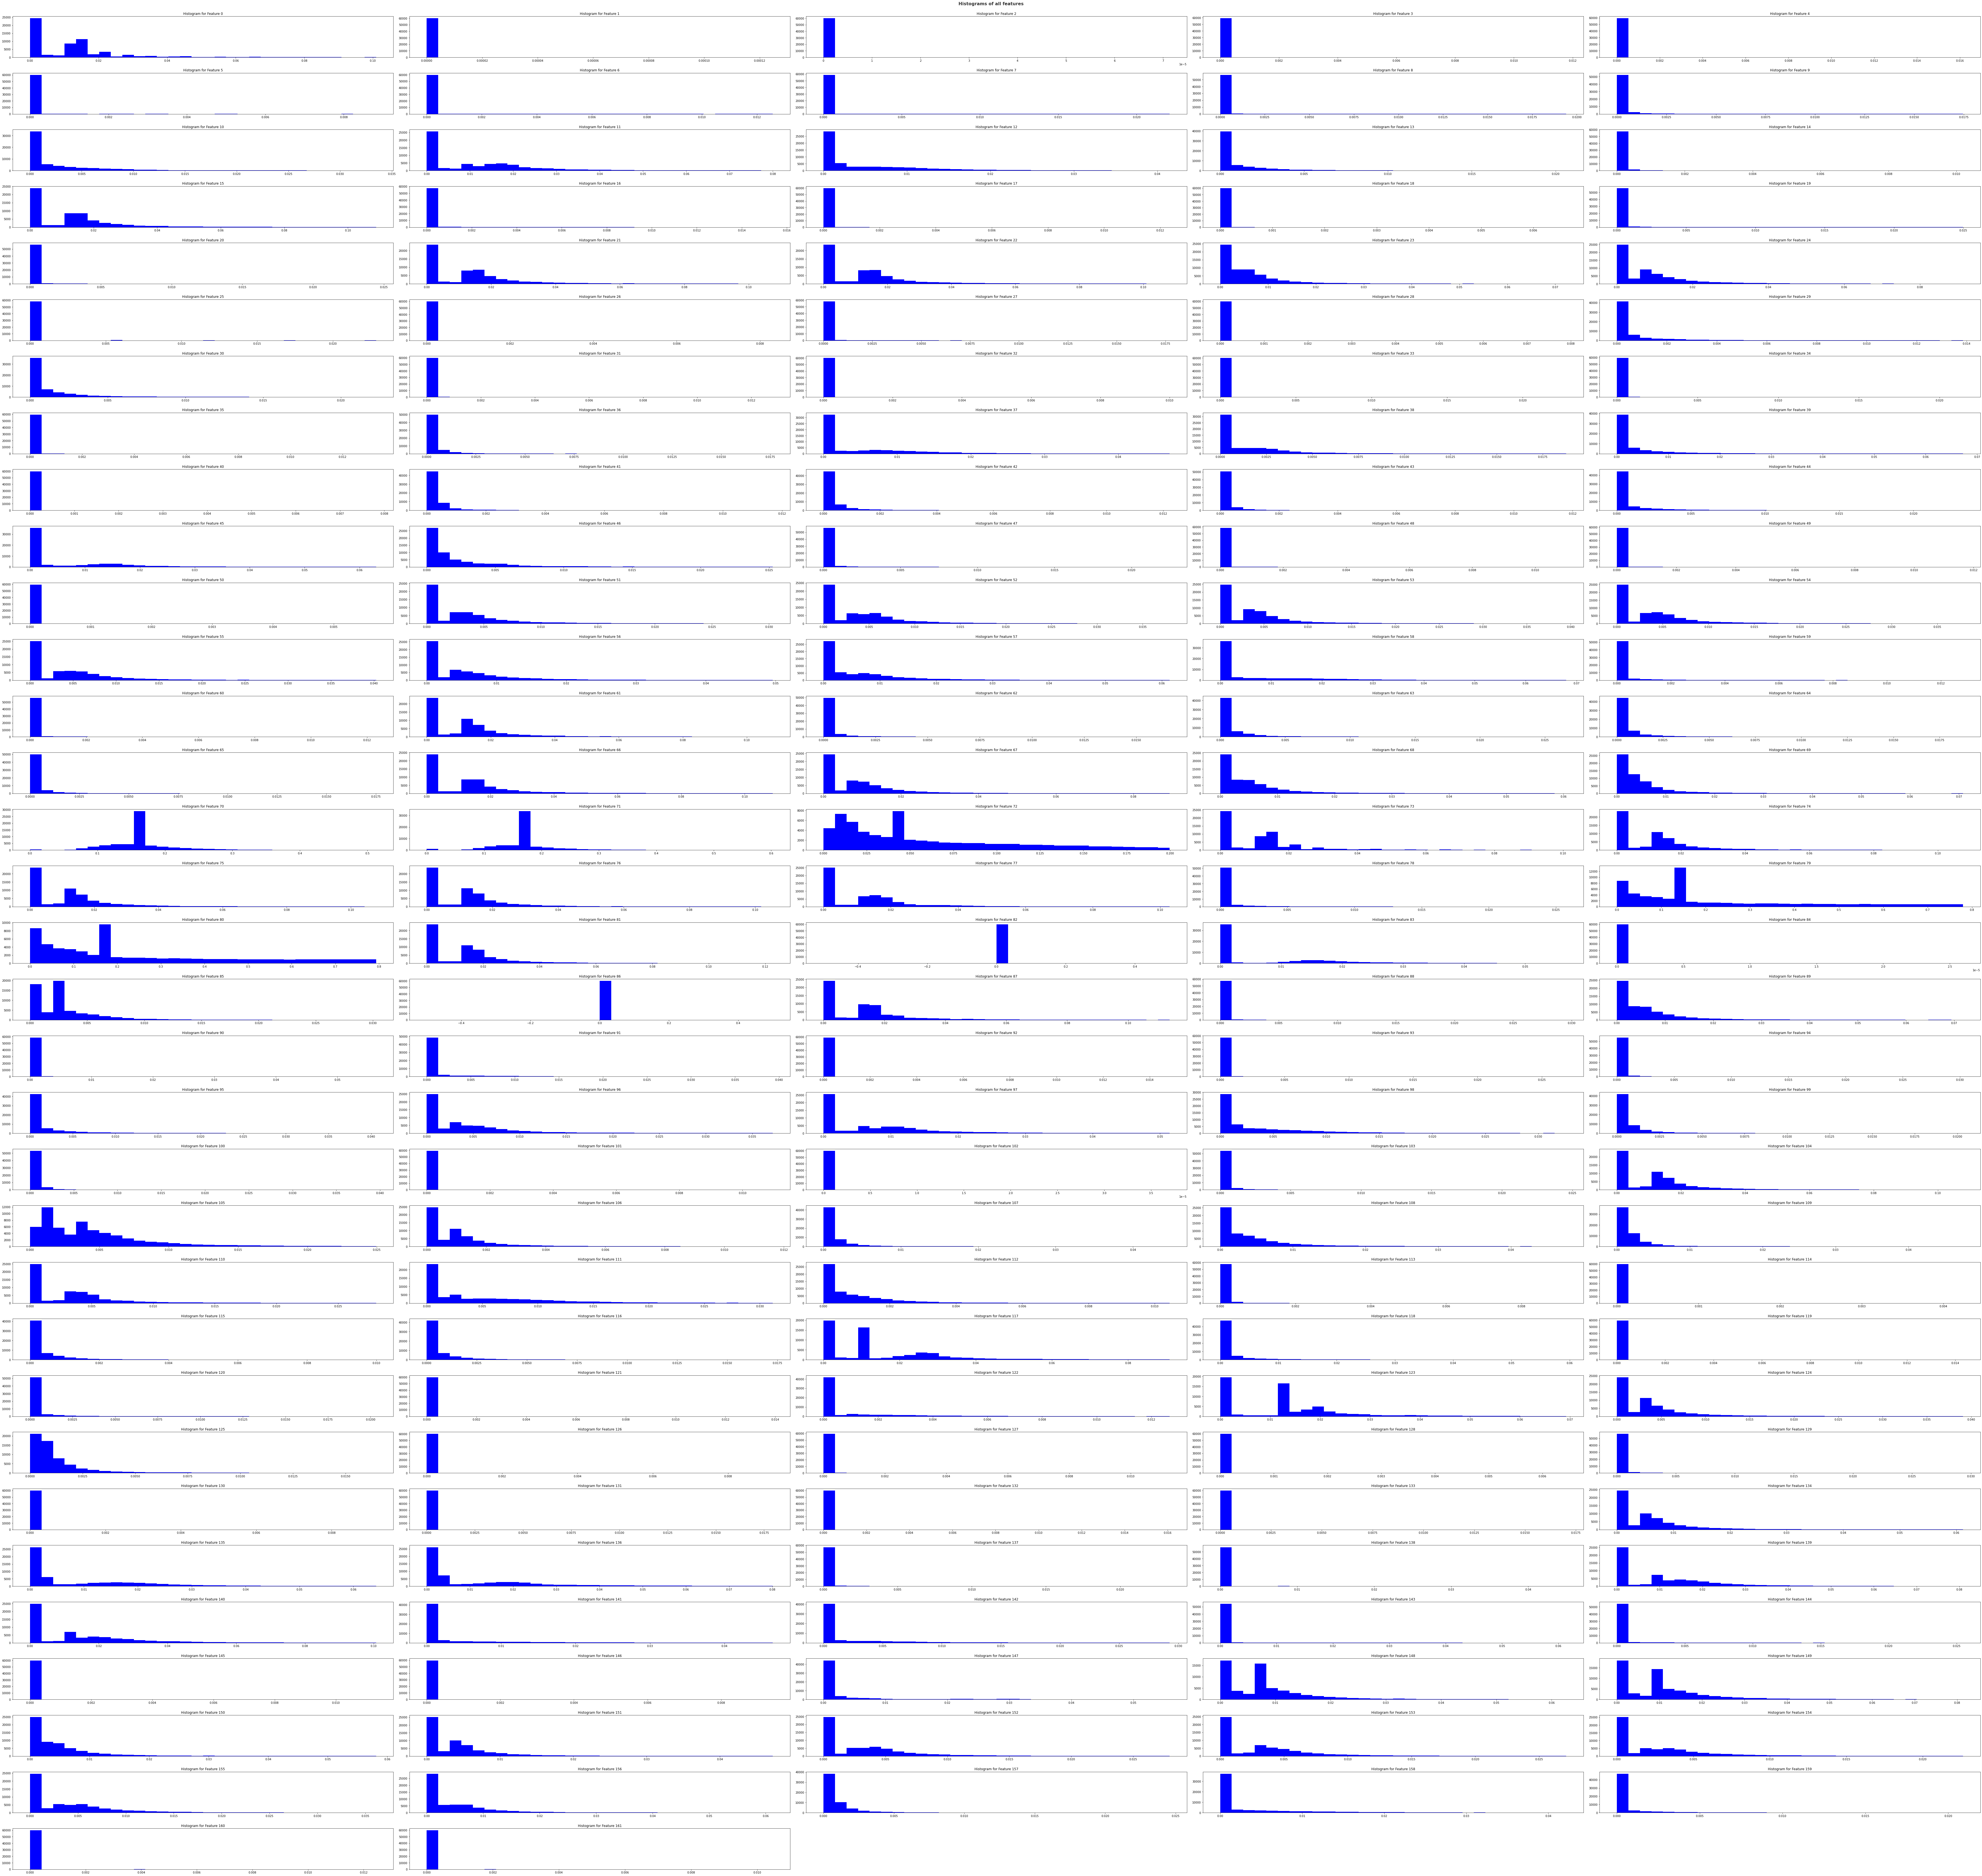

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
plt.suptitle("Histograms of all features", fontsize=16, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(35, 5, i + 1)
    plt.hist(df_scaled.iloc[:, i], color='blue', bins=30)
    plt.title(f"Histogram for Feature {i}")
    plt.tight_layout()

plt.show()

# Applying PCA

The Principal Component Analysis, called PCA, is used to reduce the dimensionality of the dataset to the minimum number of features as possible while maintaining the maximum variety, i.e., a more condensed dataset that will deliver the same results because it is focusing on its principal components.

The scaler is activated, or called, to maintain 98% of the variance, in this case. Then, the dataset - still without the column "class", is fitted in the scaler. The plot below illustrates that the number of components necessary to achieve the aforementioned variance is around 9.

In [55]:
from sklearn.decomposition import PCA

pca = PCA(0.98)
X_pca = pca.fit_transform(X)
X_pca.shape

(60000, 9)

# SCREE PLOT

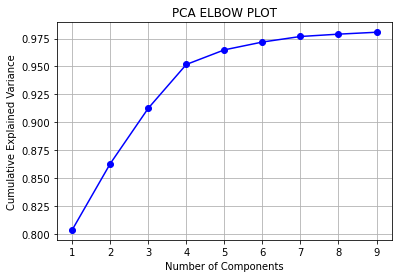

In [56]:

plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='b') 
plt.xlabel("Number of Components") 
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA ELBOW PLOT")
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))  # Setting x-ticks from 1
plt.grid(True)
plt.show()

In [57]:
pca.explained_variance_ratio_

array([0.80389628, 0.05919089, 0.04957223, 0.03914245, 0.01306158,
       0.00698549, 0.00496309, 0.00209328, 0.001708  ])

In [58]:
pca.n_components_

9

In [59]:
X_pca

array([[ 3.81978499e-01, -8.90729572e-02,  1.37209561e-01, ...,
        -3.82277883e-02,  1.03308700e-02, -1.67346962e-02],
       [-2.24381418e-01,  5.05264979e-02,  1.80623310e-01, ...,
        -1.24793092e-02, -9.83979086e-03, -4.81536552e-03],
       [-6.11793575e-02,  2.21513817e-02, -6.56974828e-02, ...,
        -1.44175318e-02, -5.85017234e-04,  2.96977507e-03],
       ...,
       [-2.95141603e-01,  1.40097762e-02, -2.03214771e-02, ...,
         6.69682767e-03, -1.40597293e-03,  3.69357024e-04],
       [-2.40077346e-01, -9.72062207e-02,  1.46309351e-01, ...,
        -5.47192427e-02, -1.16137345e-02, -6.55164973e-03],
       [ 4.05243723e-01,  9.95477285e-03, -4.47371971e-03, ...,
        -7.18337574e-03, -3.33455762e-03, -6.26226684e-03]])

In [60]:
df_pca = pd.DataFrame(X_pca, columns = ["C1", "C2", "C3", "C4","C5", "C6", "C7", "C8","C9"])
display(df_pca)


,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228,0.010331,-0.016735
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479,-0.009840,-0.004815
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418,-0.000585,0.002970
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226,-0.001724,0.000688
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699,0.003838,0.018591
...,...,...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740,-0.004836,0.009590
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670,-0.001328,0.001562
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697,-0.001406,0.000369
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719,-0.011614,-0.006552


# If we take only 7 components 

In [61]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
X_pca.shape

(60000, 7)

In [62]:
pca.explained_variance_ratio_

array([0.80389628, 0.05919089, 0.04957223, 0.03914245, 0.01306158,
       0.00698549, 0.00496309])

In [63]:
df_pca = pd.DataFrame(X_pca, columns = ["C1", "C2", "C3", "C4","C5", "C6", "C7"])
display(df_pca)

,C1,C2,C3,C4,C5,C6,C7
0,0.381978,-0.089073,0.137210,0.010637,0.057561,-0.017508,-0.038228
1,-0.224381,0.050526,0.180623,-0.032381,-0.033070,0.001566,-0.012479
2,-0.061179,0.022151,-0.065697,0.061365,-0.020714,0.005997,-0.014418
3,-0.320269,0.012590,-0.019173,-0.030474,-0.010025,0.000947,0.006226
4,0.427941,-0.024413,0.075702,-0.017921,0.075502,0.007733,-0.031699
...,...,...,...,...,...,...,...
59995,-0.083309,-0.062689,0.131940,0.183863,-0.027617,0.023544,-0.017740
59996,-0.173308,0.021086,-0.025893,-0.039264,-0.011897,0.001522,0.007670
59997,-0.295142,0.014010,-0.020321,-0.032066,-0.009751,0.001021,0.006697
59998,-0.240077,-0.097206,0.146309,0.063673,-0.032610,-0.015502,-0.054719


You can see that 7 principal components retains 0.80389628 + 0.05919089	+ 0.04957223 + 0.03914245 + 0.01306158 +0.00698549 + 0.00496309
 = 0.97681201 or 0.0.97681201 of important feature information

# Fitting Logistic Model on 7 PCA

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score
X_tr, X_t, y_tr, y_t = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)
weight = sum(y_tr == 0)/sum(y_tr == 1)
lr_full = LogisticRegression(C = 0.1, class_weight={1:weight}, random_state = 0)
lr_full.fit(X_tr, y_tr)
y_pred = lr_full.predict(X_t)

#calculate confusion matrix
cm = confusion_matrix(y_t, y_pred)
cm.ravel()
TP,FP,FN,TN=cm.ravel()

print("TP:",TP)
print("FP:",FP)
print("FN:",FN)
print("TN:",TN)
print(classification_report(y_t, y_pred))

TP: 10017
FP: 1799
FN: 54
TN: 130
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     11816
           1       0.07      0.71      0.12       184

    accuracy                           0.85     12000
   macro avg       0.53      0.78      0.52     12000
weighted avg       0.98      0.85      0.90     12000



# We get accuancy (~85%) by using only 7 components 

# Conclusion

In this analysis, it was possible to learn that high-dimensional datasets make even the most basic exploratory analysis more difficult to be executed and interpreted. Thus, PCA is a dimensionality reduction technique in order to provide a better analysis.

After using tools and techniques for cleaning the dataset and applying PCA to reduce its dimension such that 98% of the variance is retained, the dataset was resized to 7 features  from its original size of 170 features.
